In [3]:
import pandas as pd

# Columns for your CSV file
columns = ["Date", "Category", "Amount", "Notes"]

# Create an empty DataFrame
df = pd.DataFrame(columns=columns)

# Export as CSV
df.to_csv("expenses.csv", index=False)
print("expenses.csv created!")

expenses.csv created!


In [4]:
import pandas as pd

# Load the existing CSV (will be empty at first)
expenses = pd.read_csv("expenses.csv")
expenses.head()


,Date,Category,Amount,Notes


In [9]:
# Example: Add a new expense as a dictionary
new_expense = {
    "Date": "2025-07-27",
    "Category": "Groceries",
    "Amount": 450,
    "Notes": "Bought vegetables and fruits"
}

# Convert to DataFrame and append
# Use pd.concat() function instead of DataFrame.concat() method
# Also, we need to convert the dictionary to a DataFrame first
new_expense_df = pd.DataFrame([new_expense])  # Convert dict to DataFrame with single row
expenses = pd.concat([expenses, new_expense_df], ignore_index=True)  # Correct way to concatenate

# Save back to CSV
expenses.to_csv("expenses.csv", index=False)
expenses.head()

,Date,Category,Amount,Notes
0,2025-07-27,Groceries,450,Bought vegetables and fruits


In [19]:
def add_expense(date, category, amount, notes):
    # Load existing data
    df = pd.read_csv("expenses.csv")
    # Add new row
    new_row = {"Date": date, "Category": category, "Amount": amount, "Notes": notes}
    new_row_df = pd.DataFrame([new_row])      #convert new_row dict to dataframe

    # Concatenate the new row with the existing DataFrame
    df = pd.concat([df, new_row_df], ignore_index=True)
    
    # Save to CSV
    df.to_csv("expenses.csv", index=False)
    print(f"Expense added: {category} - ${amount}")
    return df  # Return the updated DataFrame

# Create a list of expenses to add
expenses_to_add = [
    {"date": "2025-07-27", "category": "Transport", "amount": 85, "notes": "Bus fare to office"},
    {"date": "2025-07-26", "category": "Dining", "amount": 300, "notes": "Lunch with friends"},
    {"date": "2025-08-01", "category": "Utilities", "amount": 120, "notes": "Electricity bill"},
    {"date": "2025-08-03", "category": "Groceries", "amount": 250, "notes": "Weekly grocery shopping"},
    {"date": "2025-08-05", "category": "Entertainment", "amount": 75, "notes": "Movie tickets and popcorn"},
    {"date": "2025-08-07", "category": "Health", "amount": 350, "notes": "Doctor's appointment and medicine"},
    {"date": "2025-08-10", "category": "Shopping", "amount": 180, "notes": "New pair of shoes"},
    {"date": "2025-08-12", "category": "Education", "amount": 200, "notes": "Online course subscription"},
    {"date": "2025-08-15", "category": "Rent", "amount": 1200, "notes": "Monthly apartment rent"},
    {"date": "2025-08-18", "category": "Transport", "amount": 40, "notes": "Taxi fare"},
    {"date": "2025-08-20", "category": "Dining", "amount": 150, "notes": "Dinner at Italian restaurant"},
    {"date": "2025-08-25", "category": "Miscellaneous", "amount": 60, "notes": "Office supplies"}
]

# Add all expenses at once
expenses_df = pd.read_csv("expenses.csv")
for expense in expenses_to_add:
    # Create a DataFrame for the new expense
    new_expense_df = pd.DataFrame([{
        "Date": expense["date"],
        "Category": expense["category"],
        "Amount": expense["amount"],
        "Notes": expense["notes"]
    }])
    
    # Concatenate with the existing DataFrame
    expenses_df = pd.concat([expenses_df, new_expense_df], ignore_index=True)
    print(f"Added: {expense['category']} - ${expense['amount']}")

# Save the final DataFrame to CSV
expenses_df.to_csv("expenses.csv", index=False)
print("All expenses have been added successfully!")

Added: Transport - $85
Added: Dining - $300
Added: Utilities - $120
Added: Groceries - $250
Added: Entertainment - $75
Added: Health - $350
Added: Shopping - $180
Added: Education - $200
Added: Rent - $1200
Added: Transport - $40
Added: Dining - $150
Added: Miscellaneous - $60
All expenses have been added successfully!


In [22]:
# Load and view expenses
df = pd.read_csv("expenses.csv")
df.head(10)  # show first 10 rows


,Date,Category,Amount,Notes
0,2025-07-27,Groceries,450,Bought vegetables and fruits
1,2025-07-27,Transport,85,Bus fare to office
2,2025-07-26,Dining,300,Lunch with friends
3,2025-07-27,Transport,85,Bus fare to office
4,2025-07-26,Dining,300,Lunch with friends
5,2025-07-27,Transport,85,Bus fare to office
6,2025-07-26,Dining,300,Lunch with friends
7,2025-08-01,Utilities,120,Electricity bill
8,2025-08-03,Groceries,250,Weekly grocery shopping
9,2025-08-05,Entertainment,75,Movie tickets and popcorn


In [43]:
#Find Your Highest Expense
df = pd.read_csv("expenses.csv")
max_index = df["Amount"].idxmax()
max_expense = df.loc[max_index]
max_expense = max_expense.reset_index() 
print("Your highest expense was:\n", max_expense)

Your highest expense was:
       index                      13
0      Date              2025-08-15
1  Category                    Rent
2    Amount                    1200
3     Notes  Monthly apartment rent


In [44]:
#Count How Many Times You Spent in Each Category

category_counts = df["Category"].value_counts()
print(category_counts)

Category
Transport        6
Dining           6
Groceries        3
Utilities        2
Entertainment    2
Health           2
Shopping         2
Education        2
Rent             2
Miscellaneous    2
Name: count, dtype: int64


In [45]:
# See Average Spending per Category
avg_by_category = df.groupby("Category")["Amount"].mean()
print(avg_by_category)

Category
Dining            250.000000
Education         200.000000
Entertainment      75.000000
Groceries         316.666667
Health            350.000000
Miscellaneous      60.000000
Rent             1200.000000
Shopping          180.000000
Transport          70.000000
Utilities         120.000000
Name: Amount, dtype: float64


In [46]:
# Get All Expenses Above a Threshold (e.g., 200 units)
high_spending = df[df["Amount"] > 200]
high_spending

,Date,Category,Amount,Notes
0,2025-07-27,Groceries,450,Bought vegetables and fruits
2,2025-07-26,Dining,300,Lunch with friends
4,2025-07-26,Dining,300,Lunch with friends
6,2025-07-26,Dining,300,Lunch with friends
8,2025-08-03,Groceries,250,Weekly grocery shopping
10,2025-08-07,Health,350,Doctor's appointment and medicine
13,2025-08-15,Rent,1200,Monthly apartment rent
18,2025-07-26,Dining,300,Lunch with friends
20,2025-08-03,Groceries,250,Weekly grocery shopping
22,2025-08-07,Health,350,Doctor's appointment and medicine


In [47]:
# Sort Your Expenses by Amount (Descending)
sorted_expenses = df.sort_values(by="Amount", ascending=False)
sorted_expenses

,Date,Category,Amount,Notes
13,2025-08-15,Rent,1200,Monthly apartment rent
25,2025-08-15,Rent,1200,Monthly apartment rent
0,2025-07-27,Groceries,450,Bought vegetables and fruits
10,2025-08-07,Health,350,Doctor's appointment and medicine
22,2025-08-07,Health,350,Doctor's appointment and medicine
18,2025-07-26,Dining,300,Lunch with friends
2,2025-07-26,Dining,300,Lunch with friends
6,2025-07-26,Dining,300,Lunch with friends
4,2025-07-26,Dining,300,Lunch with friends
8,2025-08-03,Groceries,250,Weekly grocery shopping


In [48]:
# Add a New Column: Amount in USD (if you want to experiment with conversion)
# Suppose 1 USD = 83 INR:

df["Amount_USD"] = df["Amount"] / 83
df.head()

,Date,Category,Amount,Notes,Amount_USD
0,2025-07-27,Groceries,450,Bought vegetables and fruits,5.421687
1,2025-07-27,Transport,85,Bus fare to office,1.024096
2,2025-07-26,Dining,300,Lunch with friends,3.614458
3,2025-07-27,Transport,85,Bus fare to office,1.024096
4,2025-07-26,Dining,300,Lunch with friends,3.614458


In [49]:

import pandas as pd
import matplotlib.pyplot as plt

# This line ensures that your charts display inside your notebook
%matplotlib inline


In [50]:
df = pd.read_csv("expenses.csv")


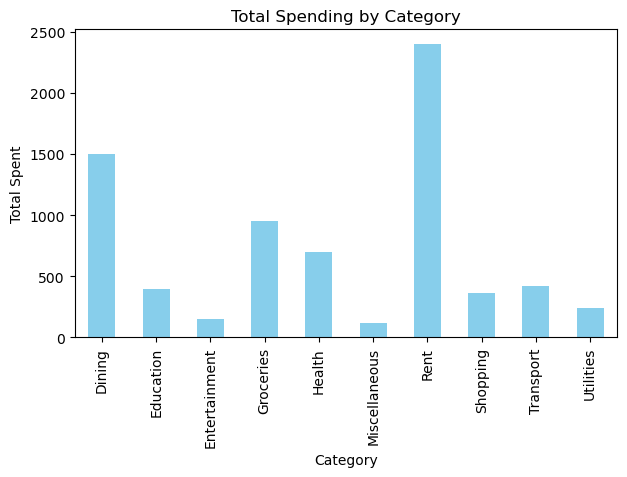

In [51]:
# 1.Calculate total spending per category
category_plot = df.groupby("Category")["Amount"].sum()

# Plot as a bar chart
category_plot.plot(kind="bar", figsize=(7,4), color="skyblue")
plt.xlabel("Category")
plt.ylabel("Total Spent")
plt.title("Total Spending by Category")
plt.show()


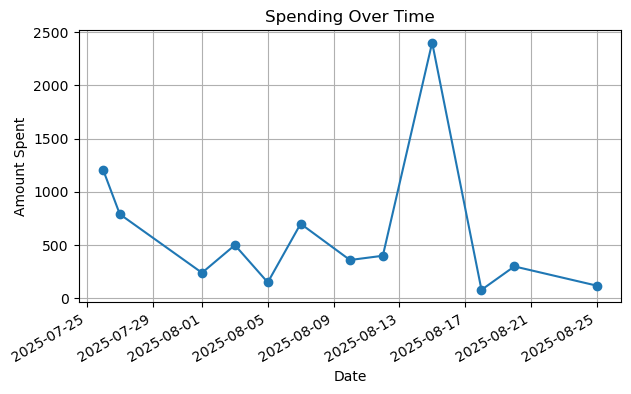

In [52]:
# 2.Convert the Date column to datetime, if not already
df["Date"] = pd.to_datetime(df["Date"])

# Group by date and sum the amounts
date_plot = df.groupby("Date")["Amount"].sum()

# Plot
date_plot.plot(kind="line", marker="o", figsize=(7,4))
plt.xlabel("Date")
plt.ylabel("Amount Spent")
plt.title("Spending Over Time")
plt.grid(True)
plt.show()


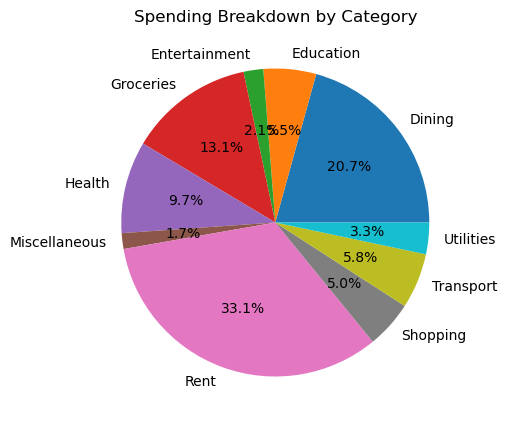

In [54]:
# 3. Spending Breakdown (Pie Chart)
category_plot = df.groupby("Category")["Amount"].sum()
category_plot.plot(kind="pie", autopct='%1.1f%%', figsize=(5,5))
plt.title("Spending Breakdown by Category")
plt.ylabel("")  # Removes redundant y-label
plt.show()